In [1]:
import pandas as pd
import numpy as np

In [2]:
import requests
import gzip
from io import BytesIO

file_url = 'https://storage.googleapis.com/open-courses/austral2023-labo3-d0e5/tb_sellout_01.txt.gz'

# Download the gzipped file using requests
response = requests.get(file_url)

# Check if the request was successful
if response.status_code == 200:
    # Create a file-like object from the response content
    file_content = BytesIO(response.content)

    # Open the gzipped file and read its lines
    with gzip.open(file_content, 'rt', encoding='utf-8') as file:
        lines = file.readlines()
    # Do further processing with the 'lines' variable

else:
    print("Failed to download the file.")


# Extract column names from the first 6 lines (assuming 6 lines for column names)
column_names = [line.strip() for line in lines[:6]]

# Create a dictionary from the data
data = {}
for i, col_name in enumerate(column_names):
    data[col_name] = [line.strip() for line in lines[6 + i::6]]

# Create the DataFrame
df_sellout = pd.DataFrame(data)


,periodo,customer_id,product_id,cust_request_qty,cust_request_tn,tn
0,201701,10234,20524,2,0.053,0.053
1,201701,10032,20524,1,0.13628,0.13628
2,201701,10217,20524,1,0.03028,0.03028
3,201701,10125,20524,1,0.02271,0.02271
4,201701,10012,20524,11,1.54452,1.54452
...,...,...,...,...,...,...
2945813,201912,10105,20853,1,0.0223,0.0223
2945814,201912,10092,20853,1,0.00669,0.00669
2945815,201912,10006,20853,7,0.02898,0.02898
2945816,201912,10018,20853,4,0.01561,0.01561


In [3]:
df_filter=df_sellout[df_sellout.product_id=="20001"].reset_index()

In [4]:
# Change data types for specific columns
df_filter['periodo'] = df_filter['periodo'].astype(int)
df_filter['customer_id'] = df_filter['customer_id'].astype(int)
df_filter['product_id'] = df_filter['product_id'].astype(int)
df_filter['cust_request_qty'] = df_filter['cust_request_qty'].astype(int)
df_filter['cust_request_tn'] = df_filter['cust_request_tn'].astype(float)
df_filter['tn'] = df_filter['tn'].astype(float)


In [5]:
df_filter.groupby('periodo')['tn'].sum()

periodo
201701     934.77222
201702     798.01620
201703    1303.35771
201704    1069.96130
201705    1502.20132
201706    1520.06539
201707    1030.67391
201708    1267.39462
201709    1316.94604
201710    1439.75563
201711    1580.47401
201712    1049.38860
201801    1169.07532
201802    1043.76470
201803    1856.83534
201804    1251.28462
201805    1293.89788
201806    1150.79169
201807    1470.41009
201808    1800.96168
201809    1438.67455
201810    2295.19832
201811    1813.01511
201812    1486.68669
201901    1275.77351
201902    1259.09363
201903    1470.65653
201904    1647.63848
201905    1629.78233
201906    1109.93769
201907    1678.99318
201908    1261.34529
201909    1660.00561
201910    1561.50552
201911    1397.37231
201912    1504.68856
Name: tn, dtype: float64

In [6]:
df_filter=df_filter[df_filter['periodo']<=201902].reset_index()

In [7]:
df_total=pd.DataFrame(df_filter.groupby('periodo')['tn'].sum())

In [8]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.6 MB/s eta 0:00:00


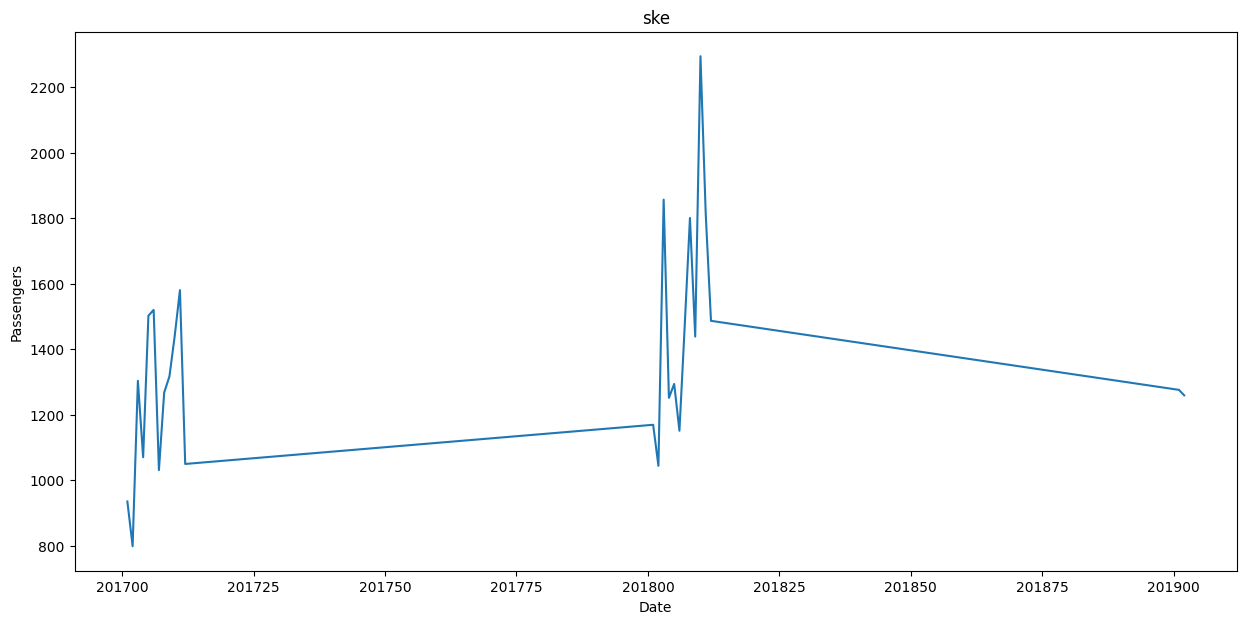

In [9]:

plt.figure(figsize=(15,7))
plt.title("ske")
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(df_total)
plt.show()

In [ ]:
df_total.columns

Index(['tn'], dtype='object')

In [10]:
df_total

,tn
periodo,
201701,934.77222
201702,798.01620
201703,1303.35771
201704,1069.96130
201705,1502.20132
201706,1520.06539
201707,1030.67391
201708,1267.39462
201709,1316.94604


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_total, *['tn'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_total, *['tn'], **{})
chart

In [11]:
ARIMA_model = pm.auto_arima(df_total['tn'],
                      start_p=1,
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

In [12]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -179.953
Date:                Sat, 21 Oct 2023   AIC                            365.907
Time:                        15:14:14   BIC                            369.441
Sample:                             0   HQIC                           366.844
                                 - 26                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9659      0.220     -4.384      0.000      -1.398      -0.534
ar.L2         -0.3621      0.235     -1.538      0.124      -0.824       0.099
sigma2      1.931e+05   7.37e+04      2.618      0.009    4.85e+04    3.38e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.55   Prob(JB):                         0.75
Heteroskedasticity (H):               2.28   Skew:                             0.12
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pm.arima()

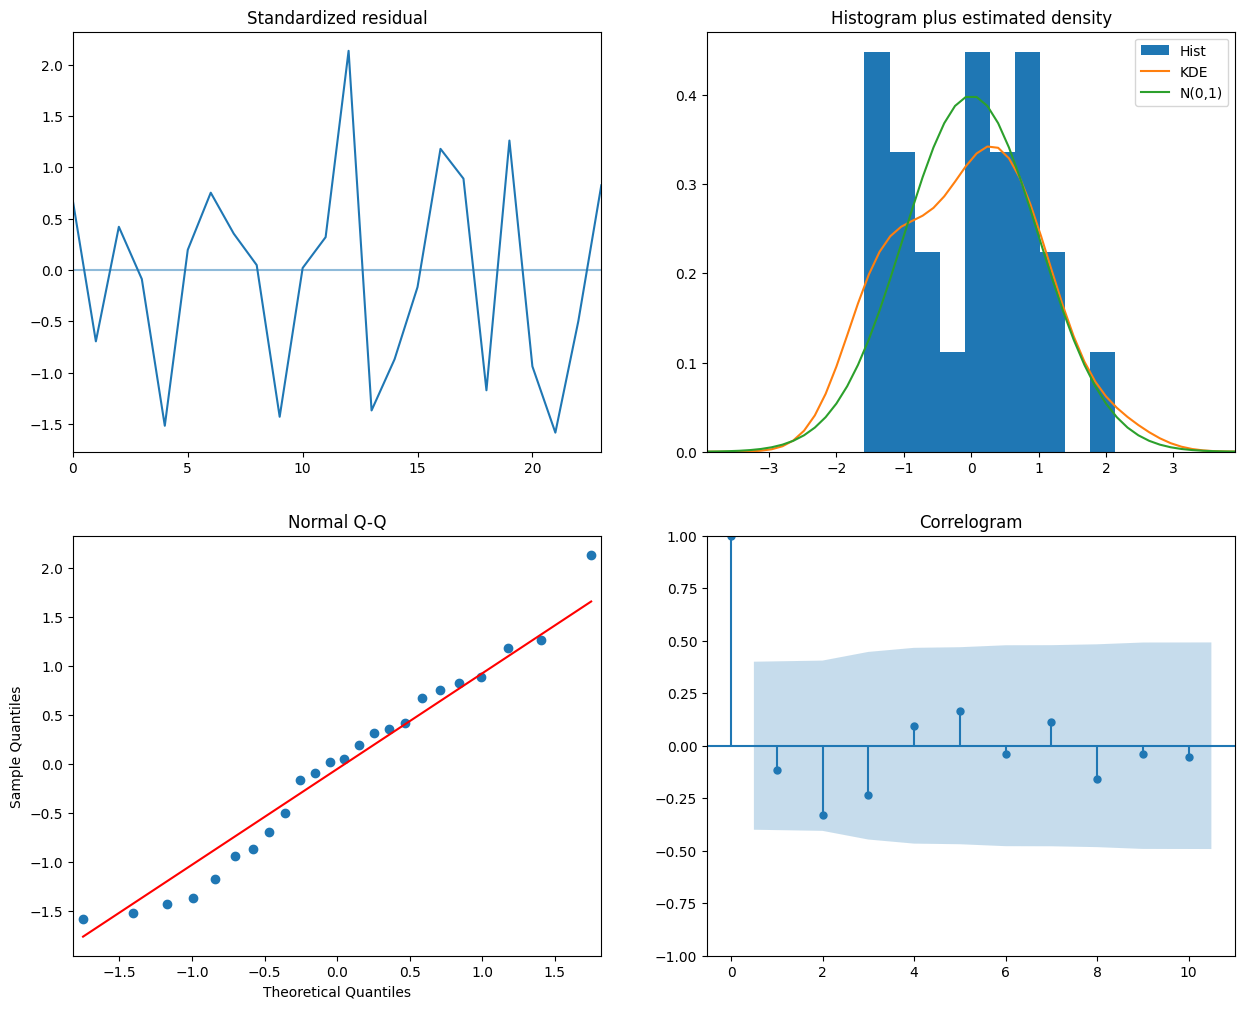

In [13]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
dos

918.1712792867397

In [ ]:
fitted

26    1013.008073
27     918.171279
dtype: float64

In [ ]:
fitted

26    1013.008073
27     918.171279
dtype: float64

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_ar=ARIMA((1,1,1,0))
model_ar=model_ar.fit(df_total['tn'])

In [ ]:
df_total

,tn
periodo,
201701,934.77222
201702,798.01620
201703,1303.35771
201704,1069.96130
201705,1502.20132
201706,1520.06539
201707,1030.67391
201708,1267.39462
201709,1316.94604


In [ ]:
# Define the order of the ARIMA model (p, d, q)
order = (1, 1, 1)  # Hypothetical values, adjust based on your data

# Create an ARIMA model
model_ar = ARIMA(df_total['tn'], order=order)

# Fit the model to your time series data
model_ar_fit = model_ar.fit()

# Predict the next two periods
forecast = model_ar_fit.forecast(steps=2)

# Display the forecas


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

In [ ]:
for product_id

26    1437.016785
27    1467.787796
Name: predicted_mean, dtype: float64


In [ ]:
df_total['tn']

periodo
201701     934.77222
201702     798.01620
201703    1303.35771
201704    1069.96130
201705    1502.20132
201706    1520.06539
201707    1030.67391
201708    1267.39462
201709    1316.94604
201710    1439.75563
201711    1580.47401
201712    1049.38860
201801    1169.07532
201802    1043.76470
201803    1856.83534
201804    1251.28462
201805    1293.89788
201806    1150.79169
201807    1470.41009
201808    1800.96168
201809    1438.67455
201810    2295.19832
201811    1813.01511
201812    1486.68669
201901    1275.77351
201902    1259.09363
Name: tn, dtype: float64

In [ ]:
model_ar.predict()

array([0.74999555, 0.74999555])

In [9]:
# Change data types for specific columns
df_sellout['periodo'] = df_sellout['periodo'].astype(int)
df_sellout['customer_id'] = df_sellout['customer_id'].astype(int)
df_sellout['product_id'] = df_sellout['product_id'].astype(int)
df_sellout['cust_request_qty'] = df_sellout['cust_request_qty'].astype(int)
df_sellout['cust_request_tn'] = df_sellout['cust_request_tn'].astype(float)
df_sellout['tn'] = df_sellout['tn'].astype(float)

In [10]:
df_sellout=df_sellout[df_sellout['periodo']<=201902].reset_index(drop=True)

In [11]:
df_all_prod=pd.DataFrame(df_sellout.groupby(['periodo','product_id'])['tn'].sum()).reset_index(drop=False)

In [12]:
df_all_prod.product_id.unique().shape

(1055,)

In [ ]:
for i,j in enumerate(df_all_prod.product_id.unique()):
  print(i,j)


In [16]:
df_all_prod.groupby('product_id')['tn'].sum()

product_id
20001    35418.47008
20002    24541.80969
20003    24307.53161
20004    17604.61030
20005    15945.46115
            ...     
21295        0.00699
21296        0.00651
21297        0.00579
21298        0.00573
21299        0.00546
Name: tn, Length: 1055, dtype: float64

In [ ]:
product_id=[]
prediction_product=[]
for j,i in  enumerate(df_all_prod.product_id.unique()):

  df_train=pd.DataFrame({'periodo':[201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902]}).merge(df_all_prod[df_all_prod['product_id']==i],how='left').reset_index(drop=True)['tn']
  df_train=df_train.fillna(0)

  ARIMA_model = pm.auto_arima(df_train,
                      start_p=1,
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)
  primer,segundo=ARIMA_model.predict(n_periods=2)
  product_id.append(i)
  prediction_product.append(segundo)
  print(j)








0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [30]:
pd.DataFrame({'product_id':product_id,'pred':prediction_product})['pred'].mean()

0.0

In [31]:
df_all_prod.product_id.unique()

array([20001, 20002, 20003, ..., 21153, 21159, 21168])

In [32]:
df_train=pd.DataFrame({'periodo':[201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
      201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
      201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
      201901, 201902]}).merge(df_all_prod[df_all_prod['product_id']==20003],how='left').reset_index(drop=True)['tn']
df_train=df_train.fillna(0)

In [33]:
df_train

0     1063.45835
1      752.11520
2      917.16548
3      525.82591
4      620.48202
5      744.08829
6      785.12398
7      864.21928
8     1465.83347
9     1958.59845
10    1426.23717
11     961.66344
12     907.56304
13     788.30749
14     778.55594
15     765.47838
16     784.35885
17     660.73323
18     656.22700
19     955.97079
20     912.34156
21    1313.34211
22    1206.91773
23     769.82869
24     964.76919
25     758.32657
Name: tn, dtype: float64

In [34]:


ARIMA_model = pm.auto_arima(df_train,
                    start_p=1,
                    start_q=1,
                    test='adf', # use adftest to find optimal 'd'
                    max_p=6, max_q=6, # maximum p and q
                    m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                    d=None,# let model determine 'd'
                    seasonal=False, # No Seasonality for standard ARIMA
                    trace=False, #logs
                    error_action='warn', #shows errors ('ignore' silences these)
                    suppress_warnings=True,
                    stepwise=True)
primer,segundo=ARIMA_model.predict(n_periods=2)

In [35]:
segundo

345.44133000000056

,periodo,product_id,tn
0,201701,20020,293.38983
1,201702,20020,296.98903
2,201703,20020,382.32230
3,201704,20020,420.63840
4,201705,20020,614.82220
5,201706,20020,469.64741
6,201707,20020,462.69354
7,201708,20020,338.83445
8,201709,20020,719.00780
9,201710,20020,623.57564


array([201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902])